In [1]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        next_q_value = max(self.q_values[next_state])  # 다음 상태의 최대 Q-값
        td_error = reward + self.gamma * next_q_value - q_value  # TD 오차 계산
        self.q_values[state][action] = q_value + self.alpha * td_error  # Q-값 업데이트
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

## For Q-Learning
+ Q-learning update

In [5]:
rewards = []
for ep in range(5000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [6]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03453, 0.03467, 0.0432],
 12: [0.05859, 0.05882, 0.06937],
 15: [0.01337, 0.01491, 0.09365],
 18: [0.02291, 0.02257, 0.13939],
 6: [0.02493, 0.0236, 0.03949],
 9: [0.04091, 0.04108, 0.04449],
 21: [0.11927, 0.12543, 0.17763],
 3: [0.02151, 0.01958, 0.0334],
 24: [0.07948, 0.07913, 0.09566],
 27: [0.0546, 0.0485, 0.20098],
 39: [0.3278, 0.33122, 0.42808],
 36: [0.1033, 0.10379, 0.1182],
 30: [0.07101, 0.08646, 0.2939],
 33: [0.24123, 0.2385, 0.29974],
 42: [0.44831, 0.43735, 0.53088],
 45: [0.0, 0.0, 0.0]}

In [7]:
show_video()

In [8]:
import os

print(os.getcwd())  # 현재 작업 디렉터리 출력

c:\Users\skepc\Downloads


In [9]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')
import os

print(os.getcwd())  # 현재 작업 디렉터리 출력

c:\Users\skepc\Downloads


In [10]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01  # 학습률
        self.gamma = 0.9    # 할인율
        self.epsilon = 0.2  # 탐험 비율
        self.q_values = defaultdict(lambda: [0.0] * actions)  # 초기 Q-값

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]  # 현재 Q(s, a)

        ################ Write Code #####################
        next_q_value = self.q_values[next_state][next_action]  # 다음 Q(s', a')

        td_error = reward + self.gamma * next_q_value - q_value  # TD 오차 계산
        self.q_values[state][action] = q_value + self.alpha * td_error  # Q값 업데이트
        #################################################

    def act(self, state):
        if np.random.rand() < self.epsilon:  # 탐험
            action = np.random.choice(self.actions)
        else:  # 탐사 (최적 행동 선택)
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [11]:
from utils import gen_wrapped_env, show_video


In [12]:
env = gen_wrapped_env('MiniGrid-DoorKey-6x6-v0')
obs = env.reset()

agent_position = obs[0]

agent = SARSA(3, agent_position)

In [13]:
rewards = []
for ep in range(20000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0.802
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0.766
episode: 520, rewards: 0.45999999999999996
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0.586
episode: 600, rewards: 0
episode: 620, rewards: 0.6759999999999999
episode: 640, rewards: 0.532
episode: 660, rewards: 0.45999999999999996
episode: 680, rewards: 0.6399999999999999
episode: 700, rewards: 0.856
episode: 720, rewards: 0
episode: 740, 

In [14]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}


{0: [0.02622, 0.02629, 0.02987],
 12: [0.04925, 0.04937, 0.05463],
 24: [0.06894, 0.06839, 0.08024],
 27: [0.15107, 0.14897, 0.21495],
 3: [0.0259, 0.02583, 0.03271],
 6: [0.03115, 0.03083, 0.0415],
 36: [0.07929, 0.07942, 0.08877],
 15: [0.06392, 0.06513, 0.09375],
 9: [0.04268, 0.04239, 0.04919],
 18: [0.08943, 0.08591, 0.14547],
 39: [0.35247, 0.35467, 0.38192],
 30: [0.19019, 0.18474, 0.29639],
 33: [0.30225, 0.30223, 0.3212],
 21: [0.15346, 0.15562, 0.17411],
 42: [0.48575, 0.48652, 0.56387],
 45: [0.0, 0.0, 0.0]}

In [15]:
show_video()


In [16]:
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [17]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

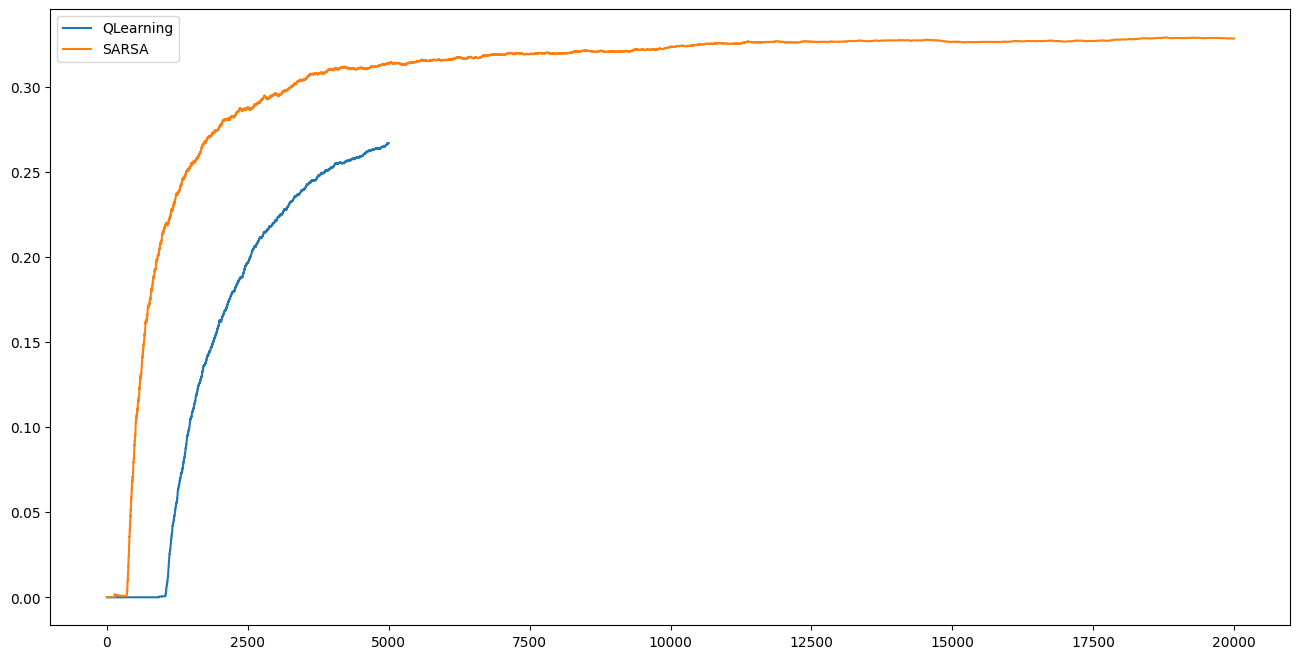

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()